# Bai 1

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
url = "D:/Workspace/Study/SelfStudy/code_for_FUN/Learn_Python/advance/Linear_Regression/data/height_weight.csv"
data = pd.read_csv(url)
data

,Height (cm),Weight (kg)
0,147,49
1,150,50
2,153,51
3,155,52
4,158,54
5,160,56
6,163,58
7,165,59
8,168,60
9,170,72


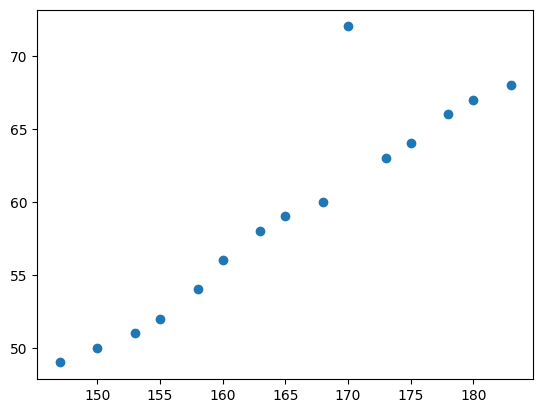

In [21]:
X = data["Height (cm)"]
y = data["Weight (kg)"]

plt.scatter(X, y)

plt.show()

Nhìn vào biểu đồ thì có 1 điểm ngoại lệ (170, 72) nên việc sử dụng thuật toán Linear regression sẽ bị ảnh hưởng và đường hồi quy sẽ thiếu chính xác vì khoảng cách (sai số) được bình phương lên, nên những điểm nằm xa đường xu hướng chung như điểm cao nhất kia sẽ có "trọng số" tác động cực lớn. Nó sẽ "kéo" đường hồi quy lệch về phía nó, làm cho đường thẳng không còn phản ánh đúng xu hướng của đại đa số các điểm còn lại.

Vậy nên bài toán sẽ loại điểm đó luôn :3

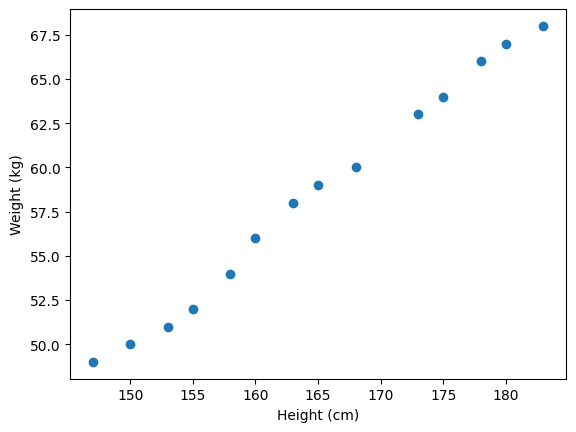

In [22]:
new_data = data[data["Height (cm)"] != 170]

X = new_data["Height (cm)"]
y = new_data["Weight (kg)"]

plt.scatter(X, y)

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")

plt.show()

Bài toán này chỉ có 1 feature có thể làm cách dể hơn không cần đụng tới ma trận nhưng tôi muốn làm luôn cho trường hợp tổng quát là có nhiều feature luôn. Flow sẽ như sau:
1. Đưa data về dạng ma trận
    - X là ma trận các feature, thêm 1 cột có toàn số 1 để tính toán hệ số chặn b
    - y là ma trận các giá trị cần dự đoán
    - w là ma trận cần tìm
2. Áp dụng công thức: ```w = (W^T * X)^-1 * X^T * y```
3. Có W => y = wX từ công thức trên có thể dự đoán các điểm mới

In [53]:
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X.to_numpy().reshape(X.shape[0], 1)), axis=1)
Xbar

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 155.],
       [  1., 158.],
       [  1., 160.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

In [56]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y.to_numpy())
w = np.dot(np.linalg.pinv(A), b)
print("W = ", w)

W =  [-34.25802789   0.56179046]
